In [1]:
# Step 1: Environment Setup and Data Loading

import pandas as pd 
import numpy as np 

ratings_path = '/kaggle/input/movielens-1m-dataset/ratings.dat'
movies_path = '/kaggle/input/movielens-1m-dataset/movies.dat'
users_path = '/kaggle/input/movielens-1m-dataset/users.dat'

# Load the ratings data (Use ISO-8859-1 encoding to avoid Unicode errors)
ratings = pd.read_csv(
    ratings_path,
    sep='::',
    engine='python',
    encoding='ISO-8859-1',
    header=None,
    names=['UserID', 'MovieID', 'Rating', 'Timestamp']
)
print("Ratings Data:")
print(ratings.head())

# Load the movies data
movies = pd.read_csv(
    movies_path,
    sep='::',
    engine='python',
    encoding='ISO-8859-1',
    header=None,
    names=['MovieID', 'Title', 'Genres']
)
print("\nMovies Data:")
print(movies.head())

# Load the users data
users = pd.read_csv(
    users_path,
    sep='::',
    engine='python',
    encoding='ISO-8859-1',
    header=None,
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
)
print("\nUsers Data:")
print(users.head())


Ratings Data:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Movies Data:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Users Data:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


Missing values in Ratings Data:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing values in Movies Data:
MovieID    0
Title      0
Genres     0
dtype: int64

Missing values in Users Data:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Ratings Data Summary:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09

Merged Data Sample:
   UserID  MovieID  Rating  Timestamp                                   Title  \
0   

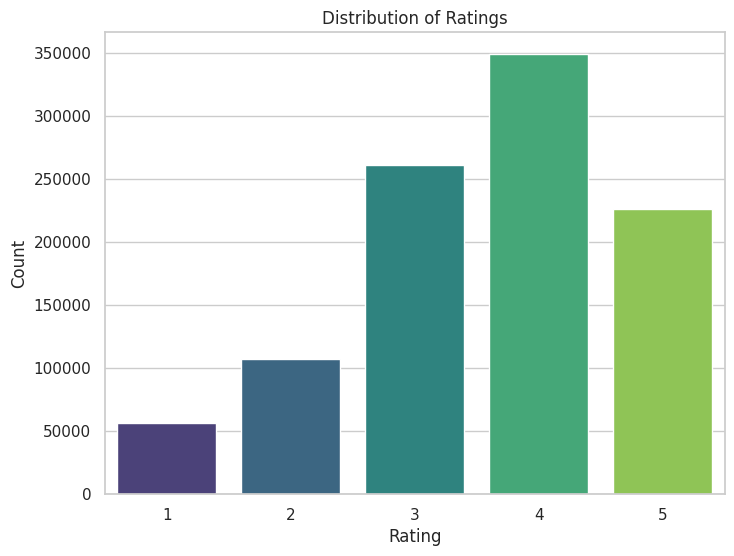

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


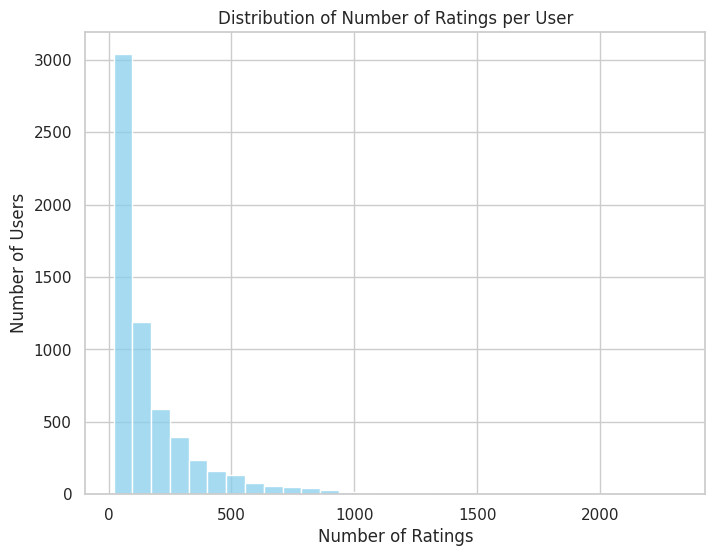

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


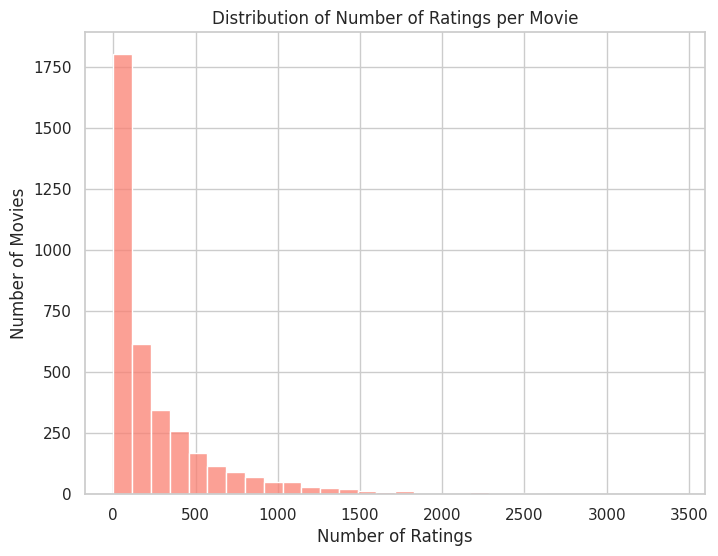

In [2]:
# Step 2: Data Preprocessing and Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Basic Data Inspection
# -------------------------

# Check for missing values in each dataset
print("Missing values in Ratings Data:")
print(ratings.isnull().sum())

print("\nMissing values in Movies Data:")
print(movies.isnull().sum())

print("\nMissing values in Users Data:")
print(users.isnull().sum())

# Display basic statistics for the ratings dataset
print("\nRatings Data Summary:")
print(ratings.describe())

# 2. Merging Datasets for a Unified View
# ----------------------------------------
# Merging ratings with movies and users allows us to analyze ratings along with movie titles and user info.
data = ratings.merge(movies, on='MovieID').merge(users, on='UserID')
print("\nMerged Data Sample:")
print(data.head())

# 3. Visualizing the Distribution of Ratings
# ---------------------------------------------
plt.figure(figsize=(8, 6))
sns.countplot(data=ratings, x='Rating', palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 4. Analyzing the Number of Ratings per User
# --------------------------------------------
# This helps us understand user engagement and the sparsity of the data.
user_ratings_count = ratings.groupby('UserID').size().reset_index(name='count')
plt.figure(figsize=(8, 6))
sns.histplot(user_ratings_count['count'], bins=30, kde=False, color='skyblue')
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

# 5. Analyzing the Number of Ratings per Movie
# ---------------------------------------------
# This analysis gives insight into the popularity distribution of movies.
movie_ratings_count = ratings.groupby('MovieID').size().reset_index(name='count')
plt.figure(figsize=(8, 6))
sns.histplot(movie_ratings_count['count'], bins=30, kde=False, color='salmon')
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()


In [4]:
!pip install higher

**MAIN CODE**

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import higher  # For differentiable inner-loop updates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --------------------------------------------------
# 1. Define the Baseline Matrix Factorization Model
# --------------------------------------------------
################################
class MFModel(nn.Module):
    def __init__(self, num_users, num_movies, embedding_dim=50):
        super(MFModel, self).__init__()
        self.user_emb = nn.Embedding(num_users, embedding_dim)
        self.movie_emb = nn.Embedding(num_movies, embedding_dim)
    
    def forward(self, user, movie):
        user_vector = self.user_emb(user)
        movie_vector = self.movie_emb(movie)
        # Sum over the embedding dimension to obtain a scalar prediction per rating.
        rating = (user_vector * movie_vector).sum(dim=-1)
        return rating

# Instantiate the model.
num_users = ratings['user_idx'].nunique()
num_movies = ratings['movie_idx'].nunique()
model = MFModel(num_users, num_movies, embedding_dim=50)
##################################

# --------------------------------------------------
# 2. Define the User Task Dataset for Meta Learning
# --------------------------------------------------
# For each user (task) with at least (n_support + n_query) ratings,
# we split the ratings into a support set (few-shot data) and a query set.
class UserTaskDataset(Dataset):
    def __init__(self, df, n_support=10, n_query=10):
        self.tasks = []
        grouped = df.groupby('user_idx')
        for user, group in grouped:
            if len(group) >= n_support + n_query:
                group = group.sample(frac=1, random_state=42)
                support = group.iloc[:n_support]
                query = group.iloc[n_support:n_support + n_query]
                self.tasks.append((support, query))
    
    def __len__(self):
        return len(self.tasks)
    
    def __getitem__(self, idx):
        support_df, query_df = self.tasks[idx]
        # Function to convert DataFrame rows to tensors.
        def df_to_tensors(df):
            users = torch.tensor(df['user_idx'].values, dtype=torch.long)
            movies = torch.tensor(df['movie_idx'].values, dtype=torch.long)
            ratings_tensor = torch.tensor(df['Rating'].values, dtype=torch.float32)
            return users, movies, ratings_tensor
        
        support_tensors = df_to_tensors(support_df)
        query_tensors = df_to_tensors(query_df)
        return support_tensors, query_tensors

# --------------------------------------------------
# 3. Define the MAML Inner-Loop Update Function
# --------------------------------------------------
def meta_training_step(model, support_tensors, query_tensors, inner_steps=1, inner_lr=0.08):
    """
    For a given task, adapt the model on the support set using a differentiable inner loop
    and compute the loss on the query set.
    """
    user_sup, movie_sup, rating_sup = support_tensors
    user_q, movie_q, rating_q = query_tensors

    # Create a differentiable copy of the model.
    with higher.innerloop_ctx(model, torch.optim.Adam(model.parameters(), lr=inner_lr), copy_initial_weights=False) as (fmodel, diffopt):
        # Inner loop adaptation on the support set.
        for _ in range(inner_steps):
            support_preds = fmodel(user_sup, movie_sup)
            support_loss = nn.MSELoss()(support_preds, rating_sup)
            diffopt.step(support_loss)
        
        # Evaluate on the query set.
        query_preds = fmodel(user_q, movie_q)
        query_loss = nn.MSELoss()(query_preds, rating_q)
    
    return query_loss

# --------------------------------------------------
# 4. Meta Training Loop
# --------------------------------------------------
meta_epochs = 30     # Number of meta-training epochs (outer loop)
inner_steps = 1      # Number of inner-loop updates per task
inner_lr = 0.08      # Learning rate for inner-loop adaptation
meta_lr = 0.05      # Outer-loop meta learning rate

meta_optimizer = optim.Adam(model.parameters(), lr=meta_lr)

for epoch in range(meta_epochs):
    meta_optimizer.zero_grad()
    meta_loss = 0.0
    
    meta_train_dataset = UserTaskDataset(train_data, n_support=10, n_query=10)
    meta_train_loader = DataLoader(meta_train_dataset, batch_size=4, shuffle=True)
    
    for support_tensors, query_tensors in meta_train_loader:
        task_loss = meta_training_step(model, support_tensors, query_tensors, inner_steps, inner_lr)
        meta_loss += task_loss
    
    meta_loss /= len(meta_train_loader)
    meta_loss.backward()
    meta_optimizer.step()
    
    print(f"Meta Epoch {epoch+1}/{meta_epochs}, Meta Loss: {meta_loss.item():.4f}")

# --------------------------------------------------
# 5. Define Fair Evaluation on Cold Start Users (<=20 ratings)
# --------------------------------------------------
# Filter test_data for cold start users (with <=20 ratings)
cold_start_users_test = test_data.groupby('UserID').filter(lambda x: len(x) <= 20)['UserID'].unique()
cold_start_test_data = test_data[test_data['UserID'].isin(cold_start_users_test)]
print("Number of cold start ratings for fair evaluation:", len(cold_start_test_data))

# For baseline evaluation, define a dataset for cold start users.
class MovieLensDataset(Dataset):
    def __init__(self, df):
        self.users = df['user_idx'].values
        self.movies = df['movie_idx'].values
        self.ratings = df['Rating'].values.astype(np.float32)
    
    def __len__(self):
        return len(self.ratings)
    
    def __getitem__(self, idx):
        return {
            'user': torch.tensor(self.users[idx], dtype=torch.long),
            'movie': torch.tensor(self.movies[idx], dtype=torch.long),
            'rating': torch.tensor(self.ratings[idx], dtype=torch.float32)
        }

def evaluate_baseline_model(model, dataset, batch_size=256):
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    model.eval()
    all_preds = []
    all_actuals = []
    
    with torch.no_grad():
        for batch in loader:
            user = batch['user']
            movie = batch['movie']
            rating = batch['rating']
            
            preds = model(user, movie)
            all_preds.extend(preds.cpu().numpy())
            all_actuals.extend(rating.cpu().numpy())
    
    rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
    mae = mean_absolute_error(all_actuals, all_preds)
    return rmse, mae

if len(cold_start_test_data) == 0:
    print("No cold start users found in the test set using the condition (<=20 ratings).")
else:
    cold_start_baseline_dataset = MovieLensDataset(cold_start_test_data)
    baseline_rmse, baseline_mae = evaluate_baseline_model(model, cold_start_baseline_dataset)
    print(f"Baseline Model - Cold Start (<=20 ratings) RMSE: {baseline_rmse:.4f}, MAE: {baseline_mae:.4f}")

# For meta evaluation, we now create a meta-test dataset using the same filtered test data.
meta_test_dataset = UserTaskDataset(cold_start_test_data, n_support=10, n_query=10)
meta_test_loader = DataLoader(meta_test_dataset, batch_size=1, shuffle=False)

def evaluate_meta_model(model, meta_dataset, inner_steps=1, inner_lr=0.01):
    """
    Evaluate the meta model on a meta-test dataset.
    For each task, adapt the model on the support set and then compute predictions on the query set.
    Returns RMSE and MAE over all tasks.
    """
    model.eval()
    all_preds = []
    all_actuals = []
    
    # Iterate over each task (batch_size=1 for clarity).
    for support_tensors, query_tensors in meta_dataset:
        user_sup, movie_sup, rating_sup = support_tensors
        user_q, movie_q, rating_q = query_tensors
        
        with higher.innerloop_ctx(model, torch.optim.Adam(model.parameters(), lr=inner_lr), track_higher_grads=False) as (fmodel, diffopt):
            for _ in range(inner_steps):
                support_preds = fmodel(user_sup, movie_sup)
                support_loss = nn.MSELoss()(support_preds, rating_sup)
                diffopt.step(support_loss)
            query_preds = fmodel(user_q, movie_q)
        
        all_preds.extend(query_preds.detach().cpu().numpy())
        all_actuals.extend(rating_q.detach().cpu().numpy())
    
    rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
    mae = mean_absolute_error(all_actuals, all_preds)
    return rmse, mae

test_rmse, test_mae = evaluate_meta_model(model, meta_test_dataset, inner_steps=inner_steps, inner_lr=inner_lr)
print(f"Meta Model Evaluation - Cold Start (<=20 ratings) RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}")



def evaluate_comparison(model, meta_dataset, inner_steps=1, inner_lr=0.08):
    """
    Evaluate and compare both baseline and meta-learning predictions on the same query sets.
    
    For each user task in the meta_dataset:
      - Baseline predictions: model applied directly on the query set.
      - Meta predictions: model adapted on the support set and then applied on the same query set.
    
    Returns:
      baseline_rmse, baseline_mae, meta_rmse, meta_mae
    """
    # Switch model to evaluation mode.
    model.eval()
    
    # Lists to store predictions and ground truth.
    all_baseline_preds = []
    all_meta_preds = []
    all_actuals = []
    
    # Iterate over each task in the meta_dataset.
    for support_tensors, query_tensors in meta_dataset:
        user_sup, movie_sup, rating_sup = support_tensors
        user_q, movie_q, rating_q = query_tensors
        
        # ---------- Baseline Prediction (No Adaptation) ----------
        # Directly predict on the query set using the original model.
        baseline_preds = model(user_q, movie_q)
        
        # ---------- Meta Prediction (With Adaptation) ----------
        # Create a differentiable copy of the model using higher.
        with higher.innerloop_ctx(model, torch.optim.Adam(model.parameters(), lr=inner_lr), track_higher_grads=False) as (fmodel, diffopt):
            # Perform inner-loop adaptation using the support set.
            for _ in range(inner_steps):
                support_preds = fmodel(user_sup, movie_sup)
                support_loss = nn.MSELoss()(support_preds, rating_sup)
                diffopt.step(support_loss)
            # After adaptation, predict on the same query set.
            meta_preds = fmodel(user_q, movie_q)
        
        # ---------- Store the Predictions and Ground Truth ----------
        # Detach predictions from the computational graph and convert to numpy arrays.
        all_baseline_preds.extend(baseline_preds.detach().cpu().numpy())
        all_meta_preds.extend(meta_preds.detach().cpu().numpy())
        all_actuals.extend(rating_q.detach().cpu().numpy())
    
    # Compute error metrics for baseline predictions.
    baseline_rmse = np.sqrt(mean_squared_error(all_actuals, all_baseline_preds))
    baseline_mae = mean_absolute_error(all_actuals, all_baseline_preds)
    
    # Compute error metrics for meta predictions.
    meta_rmse = np.sqrt(mean_squared_error(all_actuals, all_meta_preds))
    meta_mae = mean_absolute_error(all_actuals, all_meta_preds)
    
    return baseline_rmse, baseline_mae, meta_rmse, meta_mae


baseline_rmse, baseline_mae, meta_rmse, meta_mae = evaluate_comparison(model, meta_test_dataset, inner_steps=inner_steps, inner_lr=inner_lr)
print(f"Direct Comparison on Same Query Sets:")
print(f"Baseline Model - RMSE: {baseline_rmse:.4f}, MAE: {baseline_mae:.4f}")
print(f"Meta Model - RMSE: {meta_rmse:.4f}, MAE: {meta_mae:.4f}")



Meta Epoch 1/30, Meta Loss: 62.9129
Meta Epoch 2/30, Meta Loss: 47.4084
Meta Epoch 3/30, Meta Loss: 35.1616
Meta Epoch 4/30, Meta Loss: 25.7441
Meta Epoch 5/30, Meta Loss: 18.6590
Meta Epoch 6/30, Meta Loss: 13.4778
Meta Epoch 7/30, Meta Loss: 9.7783
Meta Epoch 8/30, Meta Loss: 7.2224
Meta Epoch 9/30, Meta Loss: 5.5095
Meta Epoch 10/30, Meta Loss: 4.3853
Meta Epoch 11/30, Meta Loss: 3.6729
Meta Epoch 12/30, Meta Loss: 3.2210
Meta Epoch 13/30, Meta Loss: 2.9269
Meta Epoch 14/30, Meta Loss: 2.7192
Meta Epoch 15/30, Meta Loss: 2.5440
Meta Epoch 16/30, Meta Loss: 2.3836
Meta Epoch 17/30, Meta Loss: 2.2272
Meta Epoch 18/30, Meta Loss: 2.0702
Meta Epoch 19/30, Meta Loss: 1.9109
Meta Epoch 20/30, Meta Loss: 1.7565
Meta Epoch 21/30, Meta Loss: 1.6018
Meta Epoch 22/30, Meta Loss: 1.4565
Meta Epoch 23/30, Meta Loss: 1.3195
Meta Epoch 24/30, Meta Loss: 1.1913
Meta Epoch 25/30, Meta Loss: 1.0746
Meta Epoch 26/30, Meta Loss: 0.9697
Meta Epoch 27/30, Meta Loss: 0.8753
Meta Epoch 28/30, Meta Loss: 0.

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import higher  # For differentiable inner-loop updates
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --------------------------------------------------
# 0. Preprocessing:
# --------------------------------------------------
if 'user_idx' not in ratings.columns:
    ratings['user_idx'] = ratings['UserID'].astype('category').cat.codes
if 'movie_idx' not in ratings.columns:
    ratings['movie_idx'] = ratings['MovieID'].astype('category').cat.codes


train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)


# --------------------------------------------------
# 1. Define the Baseline Matrix Factorization Model
# --------------------------------------------------
class MFModel(nn.Module):
    def __init__(self, num_users, num_movies, embedding_dim=50):
        super(MFModel, self).__init__()
        self.user_emb = nn.Embedding(num_users, embedding_dim)
        self.movie_emb = nn.Embedding(num_movies, embedding_dim)
    
    def forward(self, user, movie):
        user_vector = self.user_emb(user)
        movie_vector = self.movie_emb(movie)
        # Compute the dot product to obtain a scalar prediction per rating.
        rating = (user_vector * movie_vector).sum(dim=-1)
        return rating

# Instantiate the model.
num_users = ratings['user_idx'].nunique()
num_movies = ratings['movie_idx'].nunique()
model = MFModel(num_users, num_movies, embedding_dim=50)

# --------------------------------------------------
# 2. Define the User Task Dataset for Meta Learning
# --------------------------------------------------
class UserTaskDataset(Dataset):
    def __init__(self, df, n_support=10, n_query=10):
        self.tasks = []
        grouped = df.groupby('user_idx')
        for user, group in grouped:
            if len(group) >= n_support + n_query:
                group = group.sample(frac=1, random_state=42)
                support = group.iloc[:n_support]
                query = group.iloc[n_support:n_support + n_query]
                self.tasks.append((support, query))
    
    def __len__(self):
        return len(self.tasks)
    
    def __getitem__(self, idx):
        support_df, query_df = self.tasks[idx]
        # Convert DataFrame rows to tensors.
        def df_to_tensors(df):
            users = torch.tensor(df['user_idx'].values, dtype=torch.long)
            movies = torch.tensor(df['movie_idx'].values, dtype=torch.long)
            ratings_tensor = torch.tensor(df['Rating'].values, dtype=torch.float32)
            return users, movies, ratings_tensor
        
        support_tensors = df_to_tensors(support_df)
        query_tensors = df_to_tensors(query_df)
        return support_tensors, query_tensors

# --------------------------------------------------
# 3. Define the MAML Inner-Loop Update Function
# --------------------------------------------------
def meta_training_step(model, support_tensors, query_tensors, inner_steps=1, inner_lr=0.08):
    """
    For a given task, adapt the model on the support set using a differentiable inner loop
    and compute the loss on the query set.
    """
    user_sup, movie_sup, rating_sup = support_tensors
    user_q, movie_q, rating_q = query_tensors

    # Create a differentiable copy of the model.
    with higher.innerloop_ctx(model, torch.optim.Adam(model.parameters(), lr=inner_lr), copy_initial_weights=False) as (fmodel, diffopt):
        # Inner loop adaptation on the support set.
        for _ in range(inner_steps):
            support_preds = fmodel(user_sup, movie_sup)
            support_loss = nn.MSELoss()(support_preds, rating_sup)
            diffopt.step(support_loss)
        
        # Evaluate on the query set.
        query_preds = fmodel(user_q, movie_q)
        query_loss = nn.MSELoss()(query_preds, rating_q)
    
    return query_loss

# --------------------------------------------------
# 4. Meta Training Loop
# --------------------------------------------------
meta_epochs = 30     # Number of meta-training epochs (outer loop)
inner_steps = 1      # Number of inner-loop updates per task
inner_lr = 0.08      # Learning rate for inner-loop adaptation
meta_lr = 0.05       # Outer-loop meta learning rate

meta_optimizer = optim.Adam(model.parameters(), lr=meta_lr)

for epoch in range(meta_epochs):
    meta_optimizer.zero_grad()
    meta_loss = 0.0
    
    # Build the meta-train dataset and loader from train_data.
    meta_train_dataset = UserTaskDataset(train_data, n_support=10, n_query=10)
    meta_train_loader = DataLoader(meta_train_dataset, batch_size=4, shuffle=True)
    
    for support_tensors, query_tensors in meta_train_loader:
        task_loss = meta_training_step(model, support_tensors, query_tensors, inner_steps, inner_lr)
        meta_loss += task_loss
    
    meta_loss /= len(meta_train_loader)
    meta_loss.backward()
    meta_optimizer.step()
    
    print(f"Meta Epoch {epoch+1}/{meta_epochs}, Meta Loss: {meta_loss.item():.4f}")

# --------------------------------------------------
# 5. Define Fair Evaluation on Cold Start Users (<=20 ratings)
# --------------------------------------------------
# Identify cold start users (those with <=20 ratings) in the test set.
cold_start_users_test = test_data.groupby('UserID').filter(lambda x: len(x) <= 20)['UserID'].unique()
cold_start_test_data = test_data[test_data['UserID'].isin(cold_start_users_test)]
print("Number of cold start ratings for fair evaluation:", len(cold_start_test_data))

# For baseline evaluation, define a dataset for cold start users.
class MovieLensDataset(Dataset):
    def __init__(self, df):
        self.users = df['user_idx'].values
        self.movies = df['movie_idx'].values
        self.ratings = df['Rating'].values.astype(np.float32)
    
    def __len__(self):
        return len(self.ratings)
    
    def __getitem__(self, idx):
        return {
            'user': torch.tensor(self.users[idx], dtype=torch.long),
            'movie': torch.tensor(self.movies[idx], dtype=torch.long),
            'rating': torch.tensor(self.ratings[idx], dtype=torch.float32)
        }

def evaluate_baseline_model(model, dataset, batch_size=256):
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    model.eval()
    all_preds = []
    all_actuals = []
    
    with torch.no_grad():
        for batch in loader:
            user = batch['user']
            movie = batch['movie']
            rating = batch['rating']
            
            preds = model(user, movie)
            all_preds.extend(preds.cpu().numpy())
            all_actuals.extend(rating.cpu().numpy())
    
    rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
    mae = mean_absolute_error(all_actuals, all_preds)
    return rmse, mae

if len(cold_start_test_data) == 0:
    print("No cold start users found in the test set using the condition (<=20 ratings).")
else:
    cold_start_baseline_dataset = MovieLensDataset(cold_start_test_data)
    baseline_rmse, baseline_mae = evaluate_baseline_model(model, cold_start_baseline_dataset)
    print(f"Baseline Model - Cold Start (<=20 ratings) RMSE: {baseline_rmse:.4f}, MAE: {baseline_mae:.4f}")

# For meta evaluation, create a meta-test dataset using the filtered test data.
meta_test_dataset = UserTaskDataset(cold_start_test_data, n_support=10, n_query=10)
meta_test_loader = DataLoader(meta_test_dataset, batch_size=1, shuffle=False)

def evaluate_meta_model(model, meta_dataset, inner_steps=1, inner_lr=0.01):
    """
    Evaluate the meta model on a meta-test dataset.
    For each task, adapt the model on the support set and then compute predictions on the query set.
    Returns RMSE and MAE over all tasks.
    """
    model.eval()
    all_preds = []
    all_actuals = []
    
    # Iterate over each task.
    for support_tensors, query_tensors in meta_dataset:
        user_sup, movie_sup, rating_sup = support_tensors
        user_q, movie_q, rating_q = query_tensors
        
        with higher.innerloop_ctx(model, torch.optim.Adam(model.parameters(), lr=inner_lr), track_higher_grads=False) as (fmodel, diffopt):
            for _ in range(inner_steps):
                support_preds = fmodel(user_sup, movie_sup)
                support_loss = nn.MSELoss()(support_preds, rating_sup)
                diffopt.step(support_loss)
            query_preds = fmodel(user_q, movie_q)
        
        all_preds.extend(query_preds.detach().cpu().numpy())
        all_actuals.extend(rating_q.detach().cpu().numpy())
    
    rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
    mae = mean_absolute_error(all_actuals, all_preds)
    return rmse, mae

test_rmse, test_mae = evaluate_meta_model(model, meta_test_dataset, inner_steps=inner_steps, inner_lr=inner_lr)
print(f"Meta Model Evaluation - Cold Start (<=20 ratings) RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}")

# --------------------------------------------------
# 6. Direct Comparison: Evaluate Both Methods on the Same Query Sets
# --------------------------------------------------
def evaluate_comparison(model, meta_dataset, inner_steps=1, inner_lr=0.08):
    """
    Evaluate and compare both baseline and meta-learning predictions on the same query sets.
    
    For each user task in the meta_dataset:
      - Baseline predictions: model applied directly on the query set.
      - Meta predictions: model adapted on the support set and then applied on the same query set.
    
    Returns:
      baseline_rmse, baseline_mae, meta_rmse, meta_mae
    """
    model.eval()
    
    all_baseline_preds = []
    all_meta_preds = []
    all_actuals = []
    
    for support_tensors, query_tensors in meta_dataset:
        user_sup, movie_sup, rating_sup = support_tensors
        user_q, movie_q, rating_q = query_tensors
        
        # Baseline: Direct prediction on the query set.
        baseline_preds = model(user_q, movie_q)
        
        # Meta: Adapt using the support set, then predict on the same query set.
        with higher.innerloop_ctx(model, torch.optim.Adam(model.parameters(), lr=inner_lr), track_higher_grads=False) as (fmodel, diffopt):
            for _ in range(inner_steps):
                support_preds = fmodel(user_sup, movie_sup)
                support_loss = nn.MSELoss()(support_preds, rating_sup)
                diffopt.step(support_loss)
            meta_preds = fmodel(user_q, movie_q)
        
        all_baseline_preds.extend(baseline_preds.detach().cpu().numpy())
        all_meta_preds.extend(meta_preds.detach().cpu().numpy())
        all_actuals.extend(rating_q.detach().cpu().numpy())
    
    baseline_rmse = np.sqrt(mean_squared_error(all_actuals, all_baseline_preds))
    baseline_mae = mean_absolute_error(all_actuals, all_baseline_preds)
    meta_rmse = np.sqrt(mean_squared_error(all_actuals, all_meta_preds))
    meta_mae = mean_absolute_error(all_actuals, all_meta_preds)
    return baseline_rmse, baseline_mae, meta_rmse, meta_mae

baseline_rmse, baseline_mae, meta_rmse, meta_mae = evaluate_comparison(model, meta_test_dataset, inner_steps=inner_steps, inner_lr=inner_lr)
print(f"Direct Comparison on Same Query Sets:")
print(f"Baseline Model - RMSE: {baseline_rmse:.4f}, MAE: {baseline_mae:.4f}")
print(f"Meta Model - RMSE: {meta_rmse:.4f}, MAE: {meta_mae:.4f}")


Meta Epoch 1/30, Meta Loss: 62.2819
Meta Epoch 2/30, Meta Loss: 46.9873
Meta Epoch 3/30, Meta Loss: 34.8896
Meta Epoch 4/30, Meta Loss: 25.6103
Meta Epoch 5/30, Meta Loss: 18.6378
Meta Epoch 6/30, Meta Loss: 13.5069
Meta Epoch 7/30, Meta Loss: 9.8263
Meta Epoch 8/30, Meta Loss: 7.2813
Meta Epoch 9/30, Meta Loss: 5.5529
Meta Epoch 10/30, Meta Loss: 4.4224
Meta Epoch 11/30, Meta Loss: 3.6993
Meta Epoch 12/30, Meta Loss: 3.2433
Meta Epoch 13/30, Meta Loss: 2.9395
Meta Epoch 14/30, Meta Loss: 2.7297
Meta Epoch 15/30, Meta Loss: 2.5570
Meta Epoch 16/30, Meta Loss: 2.3972
Meta Epoch 17/30, Meta Loss: 2.2376
Meta Epoch 18/30, Meta Loss: 2.0794
Meta Epoch 19/30, Meta Loss: 1.9150
Meta Epoch 20/30, Meta Loss: 1.7546
Meta Epoch 21/30, Meta Loss: 1.6010
Meta Epoch 22/30, Meta Loss: 1.4468
Meta Epoch 23/30, Meta Loss: 1.3096
Meta Epoch 24/30, Meta Loss: 1.1779
Meta Epoch 25/30, Meta Loss: 1.0634
Meta Epoch 26/30, Meta Loss: 0.9528
Meta Epoch 27/30, Meta Loss: 0.8549
Meta Epoch 28/30, Meta Loss: 0.